In [87]:
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import lognorm
import numpy as np


vol_csv = r"C:\Users\samps\OneDrive\Documents\GitHub\Intraday-Volatility-Monitor\research\SPY_VOL.csv"
filename = r"C:\Users\samps\OneDrive\Documents\GitHub\Intraday-Volatility-Monitor\SPY_DATA_V2full.csv"
db = pd.read_csv(filename)



(np.float64(0.744837756434446), 0, np.float64(0.3225851153353976))

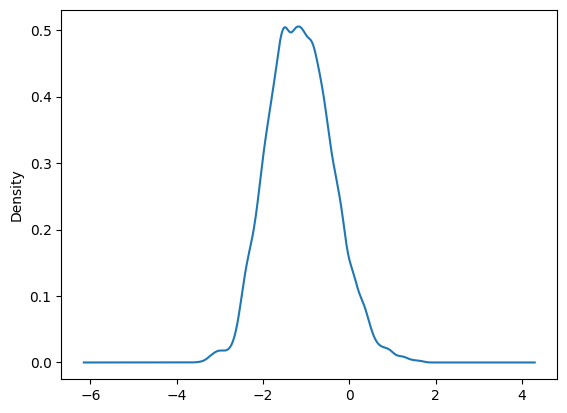

In [90]:
prices = db['price']
vol = prices.rolling(window = 30, min_periods=30).std()
vol.to_csv(vol_csv)
shape, loc, scale = lognorm.fit(vol.dropna(),floc=0)

vol_high = vol[vol > vol.mean()]
vol_low = vol[vol < vol.mean()]

np.log(vol).plot(kind='kde', label='Histogram')
#vol_low.plot(kind='hist', bins = 40, label='Histogram')


shape_high, loc_high, scale_high = lognorm.fit(vol_high, floc=0) 
shape_low, loc_low, scale_low = lognorm.fit(vol_low, floc=0) 


pdf_high = lognorm.pdf(shape_high, loc_high, scale_high)
pdf_low = lognorm.pdf(shape_low, loc_low, scale_low)
plt.plot(pdf_high)
plt.plot(pdf_low)
shape, loc, scale



